In [13]:
#Q1
import yfinance as yf

# Downloading the Tesla stock data
tesla = yf.Ticker("TSLA")

# Extracting the stock data using history() method
tesla_data = tesla.history(period="max")

# Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
#Q2
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data (Example URL)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Headers to simulate a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Requesting the webpage with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
    
    # Parsing the page content
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Checking if there are any tables on the page
    tables = soup.find_all("table")
    print(f"Found {len(tables)} tables.")
    
    # If there are tables, try to extract the first one
    if len(tables) > 0:
        revenue_table = tables[0]
        
        # Try reading the table into a DataFrame
        revenue_df = pd.read_html(str(revenue_table))[0]
        
        # Display the last five rows of the revenue data
        print(revenue_df.tail())
    else:
        print("No tables found on the page.")
else:
    print(f"Request failed with status code {response.status_code}")




Request successful!
Found 6 tables.
    Tesla Annual Revenue (Millions of US $)  \
10                                     2013   
11                                     2012   
12                                     2011   
13                                     2010   
14                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
10                                    $2,013  
11                                      $413  
12                                      $204  
13                                      $117  
14                                      $112  


C:\Users\DELL\AppData\Local\Temp\ipykernel_20632\1153475663.py:33: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  revenue_df = pd.read_html(str(revenue_table))[0]


In [18]:
#q3
# Downloading the GameStop stock data
gme = yf.Ticker("GME")

# Extracting the stock data using history() method
gme_data = gme.history(period="max")

# Reset the index and display the first five rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [27]:
#q4
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Step 2: Make a request to fetch the page content
response_gme = requests.get(url_gme)

# Step 3: Check if the request was successful
if response_gme.status_code == 200:
    # Step 4: Parse the page content with BeautifulSoup
    soup_gme = BeautifulSoup(response_gme.content, "html.parser")
    
    # Step 5: Find all tables on the page
    tables = soup_gme.find_all("table")
    
    # Step 6: Print the number of tables found 
    print(f"Found {len(tables)} tables.")
    
    # Step 7: If tables are found, extract the first one
    if len(tables) > 0:
        revenue_table_gme = tables[0]  # Use the first table
        revenue_df_gme = pd.read_html(str(revenue_table_gme))[0]  # Convert to DataFrame
        
        # Step 8: Display the last five rows of the revenue data
        print(revenue_df_gme.tail())  # Show the last 5 rows of the revenue data
    else:
        print("No tables found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response_gme.status_code}")




Failed to retrieve the page. Status code: 403


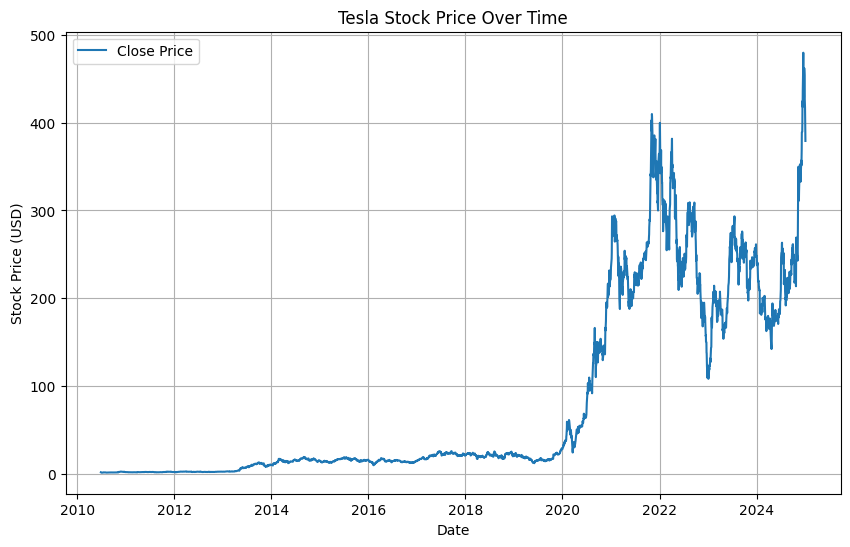

In [25]:
#q5
import matplotlib.pyplot as plt

# Plotting the Tesla Stock Data
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Tesla's stock graph
make_graph(tesla_data, "Tesla Stock Price Over Time")



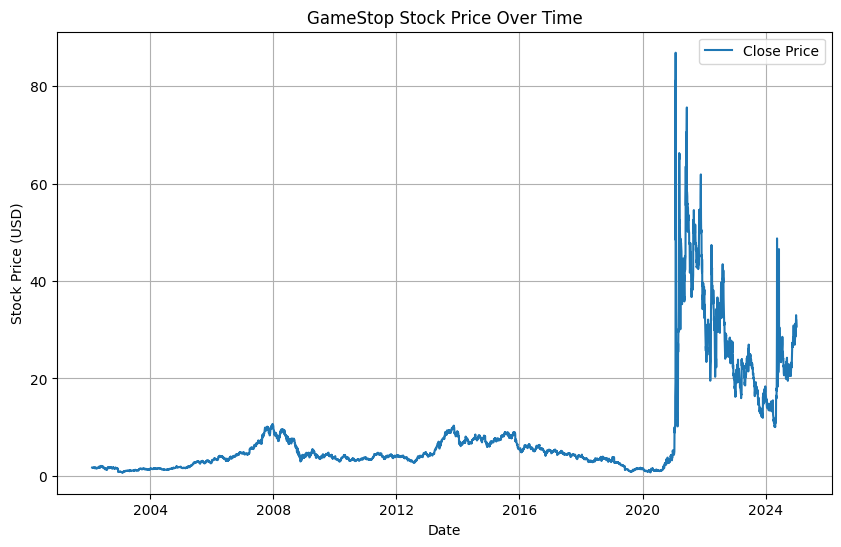

In [26]:
#q6
# Plotting the GameStop Stock Data
make_graph(gme_data, "GameStop Stock Price Over Time")
